## Exploratory Data Analysis Stage One: App Performance Overview
Stage one of our exploratory data analysis aims to expose patterns and yield insight into the nature and intensity of the customer experience within the IOS app user community. 

### The Dataset
The dataset contains the following product descriptive, rating, price, and developer data for some 475,132 apps from the App Store. 

| #  | Variable                | Date Type  | Description                                |
|----|-------------------------|------------|--------------------------------------------|
| 1  | id                      | Nominal    | App Id from the App Store                  |
| 2  | name                    | Nominal    | App Name                                   |
| 3  | description             | Nominal    | App Description                            |
| 4  | category_id             | Nominal | Numeric category identifier                |
| 5  | category                | Nominal    | Category name                              |
| 6  | price                   | Continuous | App Price                                  |
| 7  | developer_id            | Nominal    | Identifier for the developer               |
| 8  | developer               | Nominal    | Name of the developer                      |
| 9  | rating                  | Ordinal   | Average user rating since first released   |
| 10 | ratings                 | Discrete   | Number of ratings since first release      |
| 11 | released                | Continuous   | Datetime of first release                  |

### EDA Approach
Our exploration will comprise the following five analyses.

1. Structural Analysis: Examine the overall shape, structure, and type of the data.
2. Data Quality Analysis: Assess quality and suitability of the data in terms of missing values, outliers, duplication, cardinality, and feature values.
3. Univariate Analysis: Explore the distributions of rating count, average rating, categories, and price.
4. Bivariate Analysis: Evaluate ratings, rating count, reviews and correlation analysis between two variables.    
5. Multivariate Analysis: Cluster, factor, and correspondence analysis of three or more variables simultaneously.
6. Conclusions, insights and questions for stage two.


**Import Python Libraries and Provision Dependencies**

In [1]:
import os

import numpy as np
import pandas as pd
from IPython.display import HTML, display_html
import warnings
import seaborn as sns
warnings.filterwarnings(action='ignore', category=UserWarning)

import d8analysis as eda
from appstore.container import AppstoreContainer
from appstore.data.dataset.appdata import AppDataDataset

In [2]:
container = AppstoreContainer()
container.init_resources()
container.wire(packages=['appstore'])


**Obtain the Dataset**

In [3]:
repo = container.data.appdata_repo()
dataset = repo.get_dataset()

### Structural Analysis
The structure and characteristics of the AppData dataset are as follows:

In [4]:
df1 = dataset.overview
df2 = dataset.dtypes

df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:220px;'").set_caption("Dataset Structure")
df2_style = df2.style.set_table_attributes("style='display:inline; margin-right:120px'").set_caption("Dataset Data Types")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

,Characteristic,Total
0,Number of Observations,100
1,Number of Variables,11
2,Number of Cells,1100
3,Size (Bytes),209159
,Data Type,Count
0,string,5
1,float64,2
2,category,1
3,category,1
4,int64,1


As indicated above, we have approximately 475,000 apps in our dataset, described by 11 features. Let's take a quick look.

In [5]:
dataset.sample().style.hide(axis="index")

Id,Name,Description,Category_id,Category,Price,Developer_id,Developer,Rating,Ratings,Released
1575790899,Pizza Shack - Dallas GA,"Order your favorite product online with the touch of your fingers. Log in to save your favorite locations and check the status of your rewards. For more information, visit us online.",6023,Food & Drink,0.000000,1575790901,PIzza Shack Company,0.000000,0,2021-07-09 07:00:00
6447585164,The Lakes Treatment Center,"Share updates, ask questions, support others, and stay connected with others throughout your recovery. This community is a tool to help you in recovery and receive support when you need it the most. Connect with: * Peers and coaches to share updates, ask questions, and offer support. * Your recovery program to receive inspirations, updates for onsite events, and ways to be involved. Key Features: * Real-time posts: This private group allows you to stay connected to fellow alumni in real-time. * Daily inspirations help to center your thoughts and actions. * Recovery Content: Explore videos, podcasts, and articles to help you as progress in your recovery. * Discussions are a way for you to share your voice and inspire others on recovery topics. * Join virtual events directly from the app * Privacy: You control what information you share. For clients of The Lakes Treatment Center, you will be added to a private group consisting of peers.",6013,Health & Fitness,0.000000,1681868488,The Lakes Treatment Center,0.000000,0,2023-04-12 07:00:00
759142884,Biometric Passport Photo,"With this biometric passport photo app, you can format, print, or save passport photos in seconds. It comes with passport photo templates for 100 countries. As well as passport photos, this app is ideal for printing photos for job applications. More than ten popular formats for job application photos have also been predefined. This app can store, print, or email multiple passport photos on photo paper. The resulting images can be printed directly, or ordered later (not from the app) from the photo lab of your choice on the Internet. To produce the passport photos, a photo can be taken from the camera or loaded from the album. The next step is to adjust the picture by multi-touch gestures with your fingers (position, zoom and rotation). After that, the saturation, brightness, and contrast can be corrected. Photo paper (cm): 9x13, 10x13, 10x15, 11x15, 13x18, single image (selected size) Photo paper (inch): 3½x5¼, 4x5¼, 4x6, 4½x6, 5x7, single image (selected size) This app supports printing on an AirPrint-compatible printer. The print size can be adjusted in the app if needed. The passport photo will be automatically printed slightly larger in order to facilitate cutting it out. The app already provides passport photo templates for the following countries: Albania, Algeria, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahamas, Bangladesh, Belarus, Belgium, Bolivia, Bosnia and Herzegovina, Brazil, Bulgaria, Cambodia, Cameroon, Canada, Chile, China, Colombia, Croatia, Cuba, Cyprus, Czech Republic, Denmark, Dominican Republic, Ecuador, Egypt, El Salvador, European Union, Finland, France, Germany, Greece, Guatemala, Honduras, Hong Kong, Hungary, Iceland, India, Indonesia, Ireland, Israel, Italy, Jamaica, Japan, Kazakhstan, Kenya, Kyrgyzstan, Latvia, Lithuania, Luxembourg, Macedonia, Malaysia, Mexico, Moldova, Mongolia, Morocco, Myanmar, Netherlands, New Zealand, Nicaragua, Nigeria, Norway, Pakistan, Panama, Papua New Guinea, Paraguay, Peru, Philippines, Poland, Portugal, Qatar, Romania, Russia, Spain, Saudi Arabia, Serbia, Singapore, Slovakia, Slovenia, South Africa, South Korea, Spain, Sri Lanka, Sudan, Sweden, Switzerland, Taiwan, Thailand, Turkey, Turkmenistan, Uganda, Ukraine, United Arab Emirates, United Kingdom, United States, Uruguay, Uzbekistan, Venezuela, Vietnam We do not accept any liability for the correctness, accuracy, or up-to-dateness of the passport photo templates. Please check that the templates are suitable f

Identity variables, specifically (app) id and developer_id will be retained for data processing purposes, but have no other value and will be largely ignored during this analysis. 

### Data Quality Analysis
Data type, cardinality, validity, duplication, and size data are summarized at the variable level. 

In [6]:
dataset.info.style.hide(axis="index")


Column,Datatype,Valid,Null,Validity,Cardinality,Percent unique,Size
id,string,100,0,1.000000,100,1.000000,6678
name,string,100,0,1.000000,100,1.000000,8660
description,string,100,0,1.000000,100,1.000000,253542
category_id,category,100,0,1.000000,20,0.200000,1876
category,category,100,0,1.000000,20,0.200000,1986
price,float64,100,0,1.000000,4,0.040000,800
developer_id,string,100,0,1.000000,100,1.000000,6656
developer,string,100,0,1.000000,100,1.000000,7940
rating,float64,100,0,1.000000,47,0.470000,800
ratings,int64,100,0,1.000000,45,0.450000,800


**Observations**
- With the exception of released (date), we have no missing values. 
- Id's are unique and name, description, developer information, are all high-cardinality
- Category id and label are low-cardinality with 26 unique values, each. 

#### Numeric Variable Data Quality
Each feature has been cast to an appropriate data type and missing data are not extant for the dataset. Valid values for the numeric variables are:

| Variable                | Date Type  | Valid Values                                    |
|-------------------------|------------|-------------------------------------------------|
| price                   | Continuous | Non negative values                             |
| rating                  | Interval   | Real valued in [0,5]                            |
| ratings                 | Discrete   | Discrete and non-negative                       |
| released                | Continuous | Datetimes between June 10, 2008 and present day. |

Let's check the ranges for these variables.

In [7]:
stats = dataset.describe(include=[np.number, np.datetime64])
stats.numeric[['min','max']]

[08/26/2023 06:06:50 PM] [DEBUG] [d8analysis.data.dataset] [describe] : 

Entering describe.
[08/26/2023 06:06:50 PM] [DEBUG] [d8analysis.data.dataset] [_filter_split_data] : 

Entering _filter_split_data.
[08/26/2023 06:06:50 PM] [DEBUG] [d8analysis.data.dataset] [_describe_numeric] : 

Entering _describe_numeric.
[08/26/2023 06:06:50 PM] [DEBUG] [d8analysis.data.dataset] [_describe_numeric] : 

   price  rating  ratings
0   0.00    5.00        1
1   0.00    3.40       67
2   0.00    0.00        0
3   0.00    0.00        0
4   0.00    4.64      179
[08/26/2023 06:06:50 PM] [DEBUG] [d8analysis.data.dataset] [_describe_numeric] : 

Exiting _describe_numeric.


,min,max
price,0.00,99.99
rating,0.00,5.00
ratings,0.00,"35,528.00"


All numeric and datetime values are within range.

#### Categorical Variable Data Quality

The id, name, description, developer_id, and developer variables are nominal, high cardinality strings. Category and category_id; in contrast, must contain one of 26 category id / category values selected for this analysis.  

In [8]:
columns = ['category_id', 'category']
dataset.unique(columns=columns).style.hide(axis="index")

Category_id,Category
6024,Shopping
6002,Utilities
6005,Social Networking
6013,Health & Fitness
6017,Education
6015,Finance
6006,Reference
6023,Food & Drink
6012,Lifestyle
6020,Medical


Category and category_id values are as expected. 



### Univariate Analysis
#### Quantitative Data
We'll begin the univariate analysis with an examination of the quantitative variables, namely:
- Average User Rating
- Rating Count
- Price
- Release Date

Using quantitative and qualititative methods, we'll discover the central tendency of the data (arithmetic mean, median, mode), its spread (variance, standard deviation, interquartile range, maximum and minimum value) and some features of its distribution (skewness, kurtosis). 

##### Average User Rating

[08/26/2023 06:06:51 PM] [DEBUG] [matplotlib.pyplot] [switch_backend] : Loaded backend module://matplotlib_inline.backend_inline version unknown.
[08/26/2023 06:06:51 PM] [DEBUG] [matplotlib.pyplot] [switch_backend] : Loaded backend module://matplotlib_inline.backend_inline version unknown.
[08/26/2023 06:06:51 PM] [DEBUG] [matplotlib.font_manager] [_findfont_cached] : findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[08/26/2023 06:06:51 PM] [DEBUG] [matplotlib.font_manager] [_findfont_cached] : findfont: score(FontEntry(fname='/home/john/anaconda3/envs/appstore/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[08/26/2023 06:06:51 PM] [DEBUG] [matplotlib.font_manager] [_findfont_cached] : findfont: score(FontEntry(fname='/home/john/anaconda3/envs/appstore/lib/python3.10/site-packages/matplotli

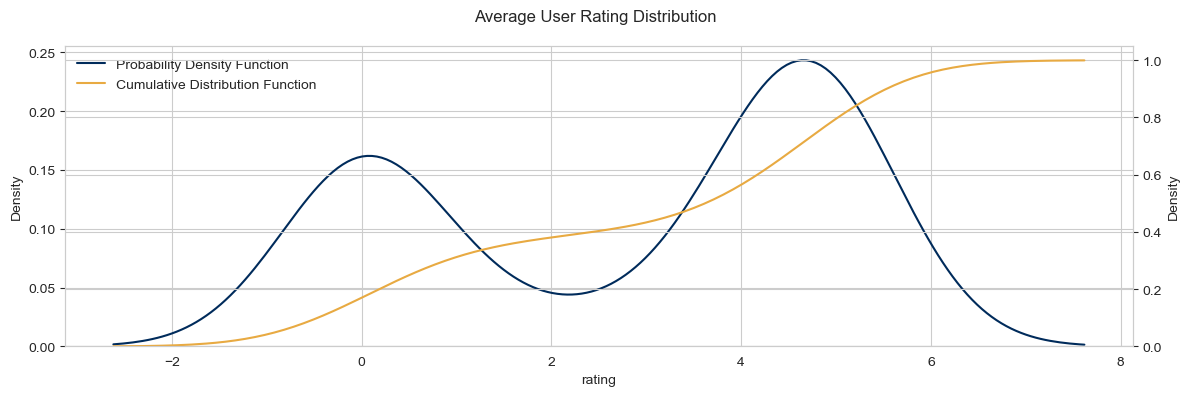

In [9]:
dataset.plot.pdfcdfplot(x='rating', title='Average User Rating Distribution')



 Since the rating scale is in [1,5], its clear that the probability density and histogram above contain apps that have not been rated. To get a sense of the actual ratings, we'll create a new dataset without the non-reviewed apps.

In [10]:
df = dataset.as_df()
df = df.loc[df['rating'] != 0]
rated = AppDataDataset(df=df)

Ok, let's examine the frequency distribution of the ratings.

,Count,Proportion,Cumulative
rating,,,
"(0.995, 2.0]",5.00,0.07,0.07
"(2.0, 3.0]",3.00,0.04,0.12
"(3.0, 4.0]",7.00,0.10,0.22
"(4.0, 5.0]",52.00,0.78,1.00
Total,67.00,1.00,


[08/26/2023 06:06:54 PM] [DEBUG] [d8analysis.data.dataset] [describe] : 

Entering describe.
[08/26/2023 06:06:54 PM] [DEBUG] [d8analysis.data.dataset] [_filter_split_data] : 

Entering _filter_split_data.
[08/26/2023 06:06:54 PM] [DEBUG] [d8analysis.data.dataset] [_describe_numeric] : 

Entering _describe_numeric.
[08/26/2023 06:06:54 PM] [DEBUG] [d8analysis.data.dataset] [_describe_numeric] : 

   rating
0    5.00
1    3.40
4    4.64
7    4.74
9    4.69
[08/26/2023 06:06:54 PM] [DEBUG] [d8analysis.data.dataset] [_describe_numeric] : 

Exiting _describe_numeric.


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
rating,67.00,4.24,1.09,1.00,4.10,4.66,4.90,5.00,-2.00,3.19


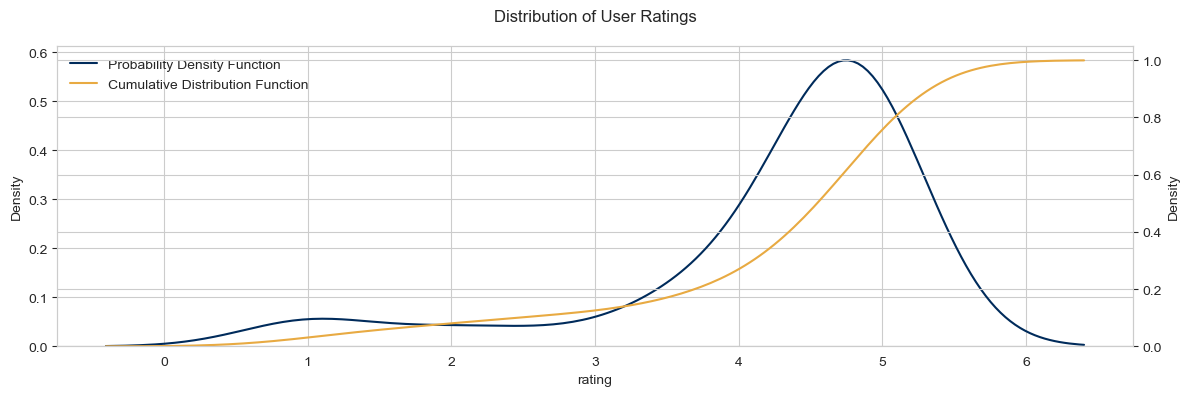

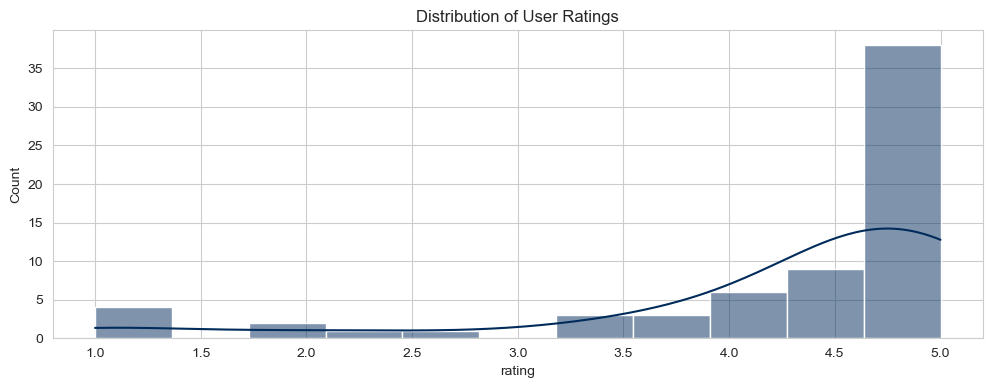

In [11]:
rated.frequency(x='rating', bins=4)
stats = rated.describe(x='rating')
stats.numeric
rated.plot.pdfcdfplot(x='rating', bins=4, title='Distribution of User Ratings')
rated.plot.histpdfplot(x='rating', title='Distribution of User Ratings')

**Key Observations:**
- The long left tail reveals a tendency towards ratings in the 4-5 star range. 
- Five star ratings make up 67% of all ratings. 
- Multiple peaks are also observed at one star and three star ratings and to a lesser degree with two stars. 
- Ratings up to one, two, and three stars, correspond to approximately 8%, 20% and 33% of the cumulative ratings respectively.
- There is no assumption of normality in the distribution of ratings.
- In short, five star ratings dominate customer opinion at this level by a significant margin.
- Note: Taking the average of ordinal values, such as user ratings, is not among the *permissible* statistical transformations whose meanings are preserved when applied to the data, according to measurement theorists, most notably, Harvard psychologist S.S Stevens, who coined the terms *nominal*, *ordinal*, *interval*, and *ratio*. Fortunately, permission is not required in data analysis

##### Rating Count
Rating count can be a harbinger of the intensity of opinion. We'll use the same rated dataset as above. 

[08/26/2023 06:06:56 PM] [DEBUG] [d8analysis.data.dataset] [describe] : 

Entering describe.
[08/26/2023 06:06:56 PM] [DEBUG] [d8analysis.data.dataset] [_filter_split_data] : 

Entering _filter_split_data.
[08/26/2023 06:06:56 PM] [DEBUG] [d8analysis.data.dataset] [_describe_numeric] : 

Entering _describe_numeric.
[08/26/2023 06:06:56 PM] [DEBUG] [d8analysis.data.dataset] [_describe_numeric] : 

   ratings
0        1
1       67
4      179
7       27
9      143
[08/26/2023 06:06:56 PM] [DEBUG] [d8analysis.data.dataset] [_describe_numeric] : 

Exiting _describe_numeric.


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
ratings,67.00,"1,469.64","5,469.03",1.00,4.00,25.00,205.00,"35,528.00",5.15,27.82


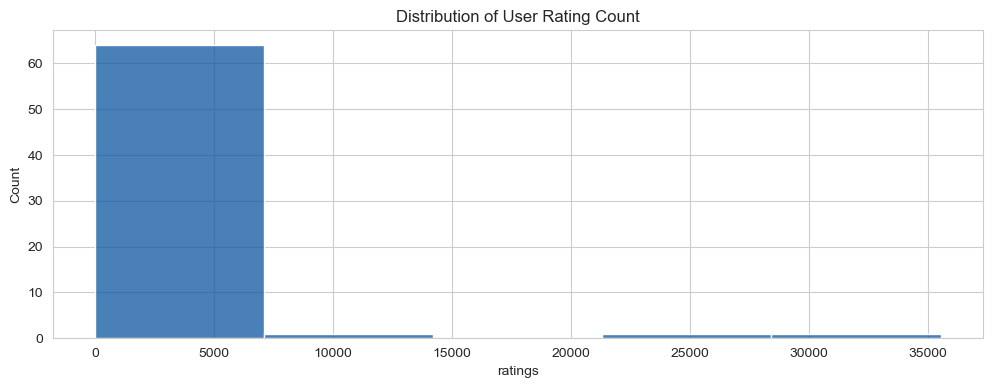

In [12]:
stats = rated.describe(x='ratings')
stats.numeric
rated.plot.histogram(x='ratings',bins=5, title='Distribution of User Rating Count')

In [13]:
rated.top_n(x='ratings', n=10)

,id,name,description,category_id,category,price,developer_id,developer,rating,ratings,released
99,490099807,PedidosYa - Delivery App,"More than ever, ask for whatever! With Pedido...",6023,Food & Drink,0.00,490099870,Pedidos Ya S.A.,4.64,35528,2011-12-23 13:51:00
87,1329922018,Invitation Maker Studio,The perfect free invitation maker & greeting c...,6027,Graphics & Design,0.00,1329922017,Clear Coast LTD,4.89,24955,2018-06-03 14:44:00
21,904693943,Astro Party,Astro Party is the ultimate portable party gam...,6014,Games,0.00,443831504,Rusty Moyher,4.62,13277,2014-10-02 07:00:00
97,759142884,Biometric Passport Photo,"With this biometric passport photo app, you ca...",6008,Photo & Video,0.00,393749449,Vitalij Schaefer,4.52,3806,2015-11-09 21:09:00
73,1356230320,Gym Workout: Trainer & Tracker,Pro Gym Workout contains exercises for 10 body...,6013,Health & Fitness,0.00,1356230319,FitCraft Technologies,4.75,3137,2018-05-01 20:40:00
17,1135930351,Piano Planet - Learn piano,"Learn how to play piano with real skill, by le...",6017,Education,0.00,513652502,EmpowerED Group Inc.,4.83,3133,2019-03-16 15:13:00
92,487054746,Spanish by Nemo,"Turn your iPhone, iPad and Apple Watch into yo...",6003,Travel,0.00,428814324,Nemo Apps LLC,4.68,2656,2012-01-01 08:00:00
66,1176710520,PhotoSquared photo wall tiles,PhotoSquared is the fastest way to print photo...,6008,Photo & Video,0.00,1176710519,"PhotoSquared, LLC",4.66,2654,2016-12-02 17:13:00
19,1437787639,InPost Mobile,Aplikacja InPost Mobile wprowadza szereg możli...,6024,Shopping,0.00,1437787638,InPost,4.92,1877,2019-02-16 10:27:00
85,1479324240,Bupa Arabia بوبا العربية,Offering you all our services in one app for y...,6013,Health & Fitness,0.00,490469373,BUPA Arabia for Cooperative Insurance,4.40,1724,2019-09-16 07:00:00


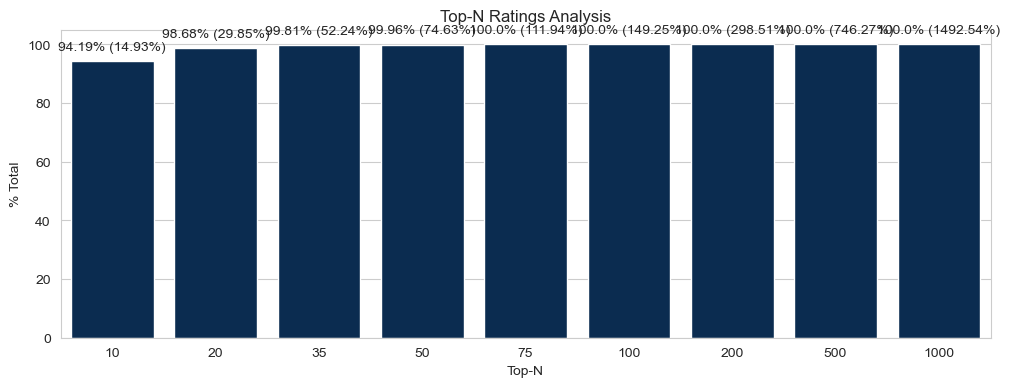

In [14]:
topn = np.array([10,20,35,50,75,100,200,500,1000])
rated.plot.topn_plot(x='ratings', n=topn)

**Key Observations:**
- The distribution of rating counts has a long right tail, with a range from 1 to nearly 31 m ratings. 
- The central tendency is placed at a median of 10 ratings per app. The average is pulled in the direction of the outliers and is about 4.5k ratings.
- Giants of big-tech, social-media, an e-commerce, such as YouTube, Tik-Tok, Spotify, WhatsApp and DoorDash are among the most rated apps in the App Store.
- The top-10 most-rated apps account for nearly 14% of all ratings and less than 1/10th of a percent of all apps. Still, the most-rated 1000 apps, which represent 1/3rd of one percent of all apps, consume nearly 75% of all ratings. 
- Takeaway: Rating counts are vastly disproportionate.
- Note: Apps with earlier release dates may have higher rating counts. Ratings per day since release will remove the temporal dimension from the rating counts. 

In [15]:
with pd.option_context('format.precision',2):
    df1_style = freq.style.set_table_attributes("style='display:inline; margin-right:220px;'").set_caption("Average User Rating Frequency Distribution")
    df2_style = desc.style.set_table_attributes("style='display:inline; margin-right:120px'").set_caption("Average User Rating Descriptive Statistics")
    display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

NameError: name 'freq' is not defined

**Key Observations**
- The five-star ratings represent 67% of nearly 291,000 ratings in the dataset. 
- Ratings up to four-star comprise just 33% of all ratings. Three stars and below make up approximately 20% of the data; whereas, one and two star ratings represent less than 10% of all ratings.
- The mean of average user ratings, 4.09 stars, is influenced by the significant left skew. The median of 4.53 is a more robust measure of centrality, given the long left-tail in the distribution.
- The assumption of a normal distribution is violated as shown in the histogram, and the probability density functions.

#### Ratings
Next, we explore the distribution of rating counts in the dataset.

In [ ]:
p = eda.KDEPlot(data=df_ratings, x='ratings', title="Rating Count\nProbability Density Function")
h = eda.Histogram(data=df_ratings, x='ratings', title="Rating Count\nHistogram")
c = eda.ECDFPlot(data=df_ratings, x='ratings', title="Rating Count\nCumulative Distribution Function")
v = eda.ViolinPlot(data=df_ratings,x='ratings', title="Rating Count Distribution")
plots = [p]

visual = Visual()
for plot in plots:
    visual.add_plot(plot=plot)
visual.visualize()